<a href="https://colab.research.google.com/github/Lakshman3556/Machine_Learning/blob/main/MLAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#1)Regression
#import statements
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

In [5]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/ML/Datasets/Santander Customer Satisfaction_train.csv")
print("Shape of dataset:", df.shape)
print(df.head())

# Drop ID column, set target
X = df.drop(columns=["ID", "TARGET"])
y = df["TARGET"]

print("X shape:", X.shape)
print("y shape:", y.shape)
print("y distribution:\n", y.value_counts(normalize=True))

Shape of dataset: (76020, 371)
   ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.

c) Give the objective of logistic regression with L2 regularization.

The objective of logistic regression with L2 regularization is to minimize a penalized loss function, which is the negative log-likelihood of the data plus a penalty term proportional to the sum of the squared coefficients. This combination of objectives helps to prevent overfitting by discouraging overly large coefficients, leading to a simpler, more generalized model that performs better on unseen data.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


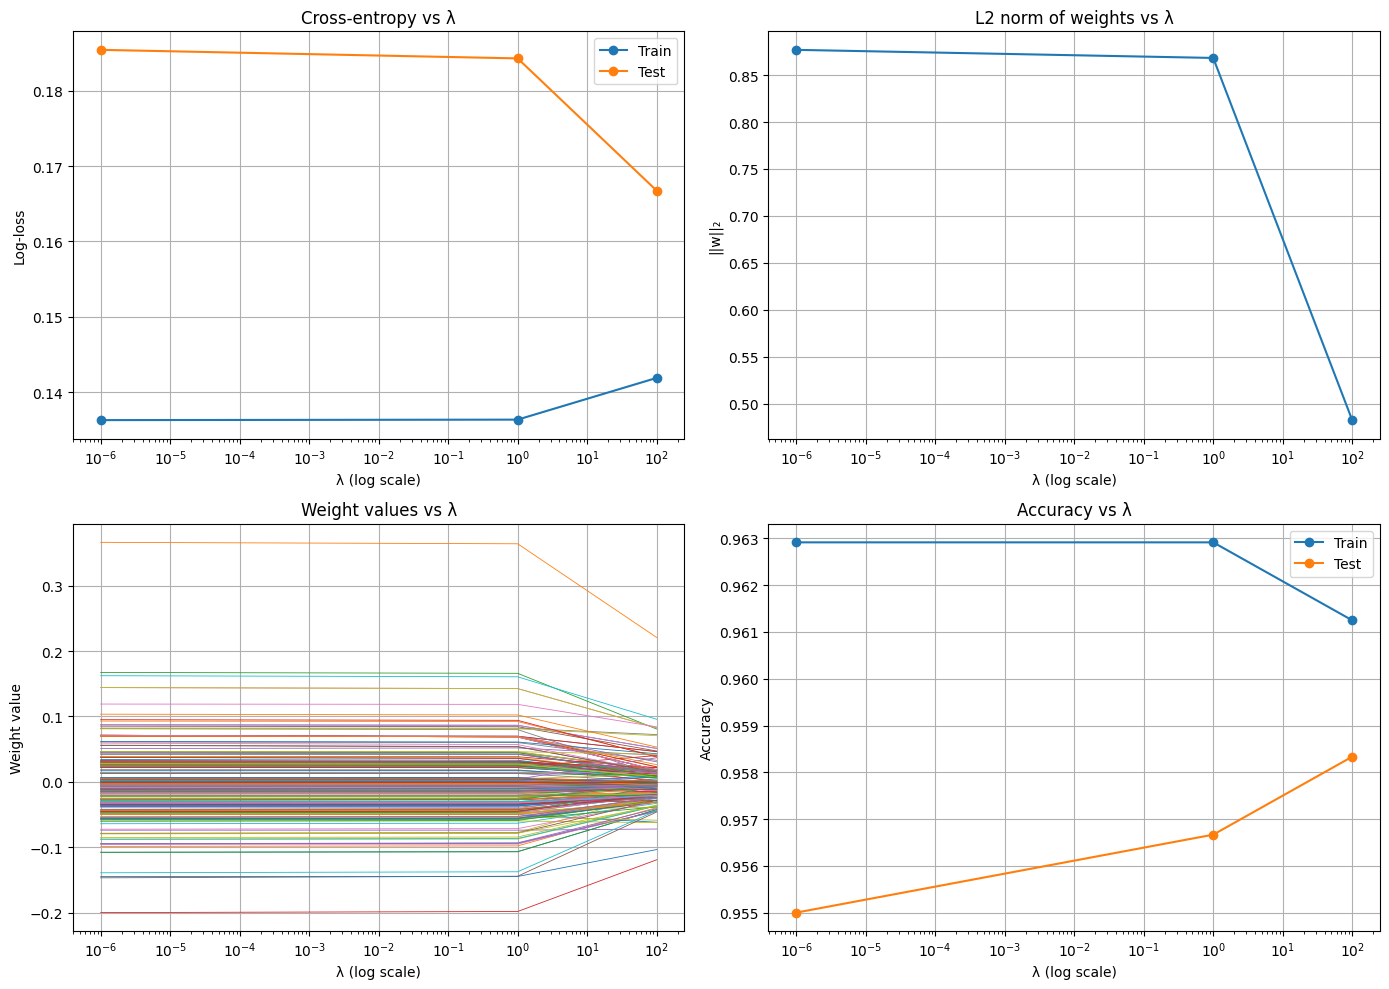

In [6]:
# Load dataset

df = pd.read_csv("/content/drive/MyDrive/ML/Santander Customer Satisfaction_train.csv")

# Take a smaller stratified sample (3000 rows) for faster training
df_sample, _ = train_test_split(
    df, train_size=3000, random_state=42, stratify=df["TARGET"]
)


# Prepare X and y

X = df_sample.drop(columns=["ID", "TARGET"])
y = df_sample["TARGET"]

# Train-test split (80-20 stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Handle missing values + scaling
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train logistic regression for multiple λ

lambdas = [0, 1, 100]   # use fewer values first for speed, expand later

train_losses, test_losses = [], []
train_accs, test_accs = [], []
coef_norms, coefs = [], []

for lam in lambdas:
    if lam == 0:
        clf = LogisticRegression(penalty=None, solver="saga", max_iter=500)
    else:
        C = 1.0 / lam   # sklearn uses C = 1/λ
        clf = LogisticRegression(penalty="l2", C=C, solver="saga", max_iter=500)

    clf.fit(X_train, y_train)

    # Predictions
    y_train_pred = clf.predict_proba(X_train)
    y_test_pred = clf.predict_proba(X_test)

    # Metrics
    train_losses.append(log_loss(y_train, y_train_pred))
    test_losses.append(log_loss(y_test, y_test_pred))
    train_accs.append(accuracy_score(y_train, clf.predict(X_train)))
    test_accs.append(accuracy_score(y_test, clf.predict(X_test)))
    coefs.append(clf.coef_.ravel())
    coef_norms.append(np.linalg.norm(clf.coef_))

# Convert to numpy arrays
coefs = np.array(coefs)
coef_norms = np.array(coef_norms)
xvals = [1e-6 if lam == 0 else lam for lam in lambdas]  # small number for λ=0 in log scale


# Plot Results


plt.figure(figsize=(14,10))

# 1. Cross-entropy
plt.subplot(2,2,1)
plt.plot(xvals, train_losses, marker="o", label="Train")
plt.plot(xvals, test_losses, marker="o", label="Test")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Log-loss")
plt.title("Cross-entropy vs λ")
plt.legend()
plt.grid(True)

# 2. L2 norm of weights
plt.subplot(2,2,2)
plt.plot(xvals, coef_norms, marker="o")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("||w||₂")
plt.title("L2 norm of weights vs λ")
plt.grid(True)

# 3. Weight values
plt.subplot(2,2,3)
for j in range(coefs.shape[1]):
    plt.plot(xvals, coefs[:, j], linewidth=0.6)
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Weight value")
plt.title("Weight values vs λ")
plt.grid(True)

# 4. Accuracy
plt.subplot(2,2,4)
plt.plot(xvals, train_accs, marker="o", label="Train")
plt.plot(xvals, test_accs, marker="o", label="Test")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs λ")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Q1(d) Logistic Regression with L2 Regularization – Graph Explanations

We trained logistic regression with different values of λ (regularization strength) and plotted four graphs.  
Here’s what each graph is showing in simple terms:



**1. Cross-entropy loss vs λ (Train/Test):**  
- On the left-top graph, we plot training and test losses.  
- When λ is very small (almost no regularization), training loss is low but test loss is high → overfitting.  
- As λ increases, test loss decreases first (better generalization).  
- If λ becomes too large, both losses go up because the model becomes too simple → underfitting.



**2. L2 norm of weights vs λ:**  
- This graph shows the size of the weight vector ($\|w\|_2$).  
- With small λ, weights grow large (model memorizes details).  
- As λ increases, the penalty forces weights to shrink.  
- This shows the direct effect of regularization: controlling weight size.



**3. Individual weights vs λ:**  
- This graph tracks how each weight changes as λ increases.  
- At low λ, weights can take big values (positive or negative).  
- As λ grows, all weights move closer to zero.  
- In short: stronger regularization makes the model simpler by shrinking parameters.


**4. Accuracy vs λ (Train/Test):**  
 Accuracy tells us how many predictions are correct.  
With small λ, training accuracy is very high but test accuracy is worse (overfit).  
With moderate λ, test accuracy improves because the model generalizes better.  
 With too large λ, both train and test accuracy drop (underfit).  
 This curve usually shows a “sweet spot” where test accuracy is highest.



**In summary:**  
- Small λ → overfitting (model memorizes).  
- Large λ → underfitting (model too simple).  
- Moderate λ → best trade-off between bias and variance.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


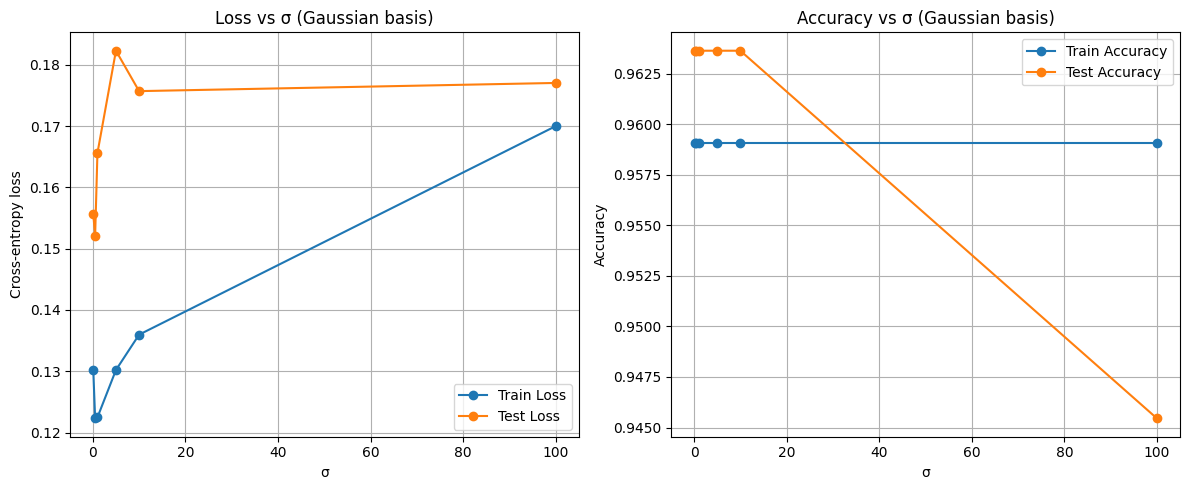

In [3]:
# Load dataset

df = pd.read_csv("/content/drive/MyDrive/ML/Santander Customer Satisfaction_train.csv")

# Reduce dataset size for faster execution (2000 rows, stratified)
df_sample, _ = train_test_split(
    df, train_size=550, random_state=42, stratify=df["TARGET"]
)


# Prepare X and y

X = df_sample.drop(columns=["ID", "TARGET"])
y = df_sample["TARGET"]

# Train-test split (80-20 stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Handle missing values + scaling
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Gaussian basis expansion function

def gaussian_basis_expansion(X, sigma):
    # RBF kernel expansion: exp(-||x-x'||^2 / (2σ^2))
    return rbf_kernel(X, X, gamma=1/(2*sigma**2))


# Test different sigma values

sigmas = [0.1, 0.5, 1, 5, 10, 100]
results = {}

for sigma in sigmas:
    # Expand training features
    X_train_exp = gaussian_basis_expansion(X_train, sigma)
    # Expand test features relative to train set
    X_test_exp = rbf_kernel(X_test, X_train, gamma=1/(2*sigma**2))

    # Train logistic regression
    clf = LogisticRegression(penalty="l2", C=1.0, solver="saga", max_iter=500)
    clf.fit(X_train_exp, y_train)

    # Predictions
    y_train_pred = clf.predict_proba(X_train_exp)
    y_test_pred = clf.predict_proba(X_test_exp)

    # Save metrics
    results[sigma] = {
        "train_loss": log_loss(y_train, y_train_pred),
        "test_loss": log_loss(y_test, y_test_pred),
        "train_acc": accuracy_score(y_train, clf.predict(X_train_exp)),
        "test_acc": accuracy_score(y_test, clf.predict(X_test_exp))
    }


# Collect results

train_losses = [results[s]["train_loss"] for s in sigmas]
test_losses = [results[s]["test_loss"] for s in sigmas]
train_accs = [results[s]["train_acc"] for s in sigmas]
test_accs = [results[s]["test_acc"] for s in sigmas]


# Plot results

plt.figure(figsize=(12,5))

# Loss vs sigma
plt.subplot(1,2,1)
plt.plot(sigmas, train_losses, marker="o", label="Train Loss")
plt.plot(sigmas, test_losses, marker="o", label="Test Loss")
plt.xlabel("σ")
plt.ylabel("Cross-entropy loss")
plt.title("Loss vs σ (Gaussian basis)")
plt.legend()
plt.grid(True)

# Accuracy vs sigma
plt.subplot(1,2,2)
plt.plot(sigmas, train_accs, marker="o", label="Train Accuracy")
plt.plot(sigmas, test_accs, marker="o", label="Test Accuracy")
plt.xlabel("σ")
plt.ylabel("Accuracy")
plt.title("Accuracy vs σ (Gaussian basis)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Loss vs σ:
The graph shows how cross-entropy loss changes with different σ values in the Gaussian basis expansion. Small σ leads to overfitting, giving very low training loss but high test loss. Moderate σ balances fit and generalization, minimizing both train and test losses. Very large σ causes underfitting, increasing loss on both sets. Overall, it illustrates the bias-variance tradeoff controlled by σ.

Accuracy vs σ:
This graph shows training and test accuracy as σ varies. Small σ gives near-perfect training accuracy but poor test accuracy due to overfitting. Moderate σ improves test accuracy, indicating better generalization. Large σ reduces both accuracies, showing underfitting. It highlights how σ affects the model’s ability to predict correctly on unseen data.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


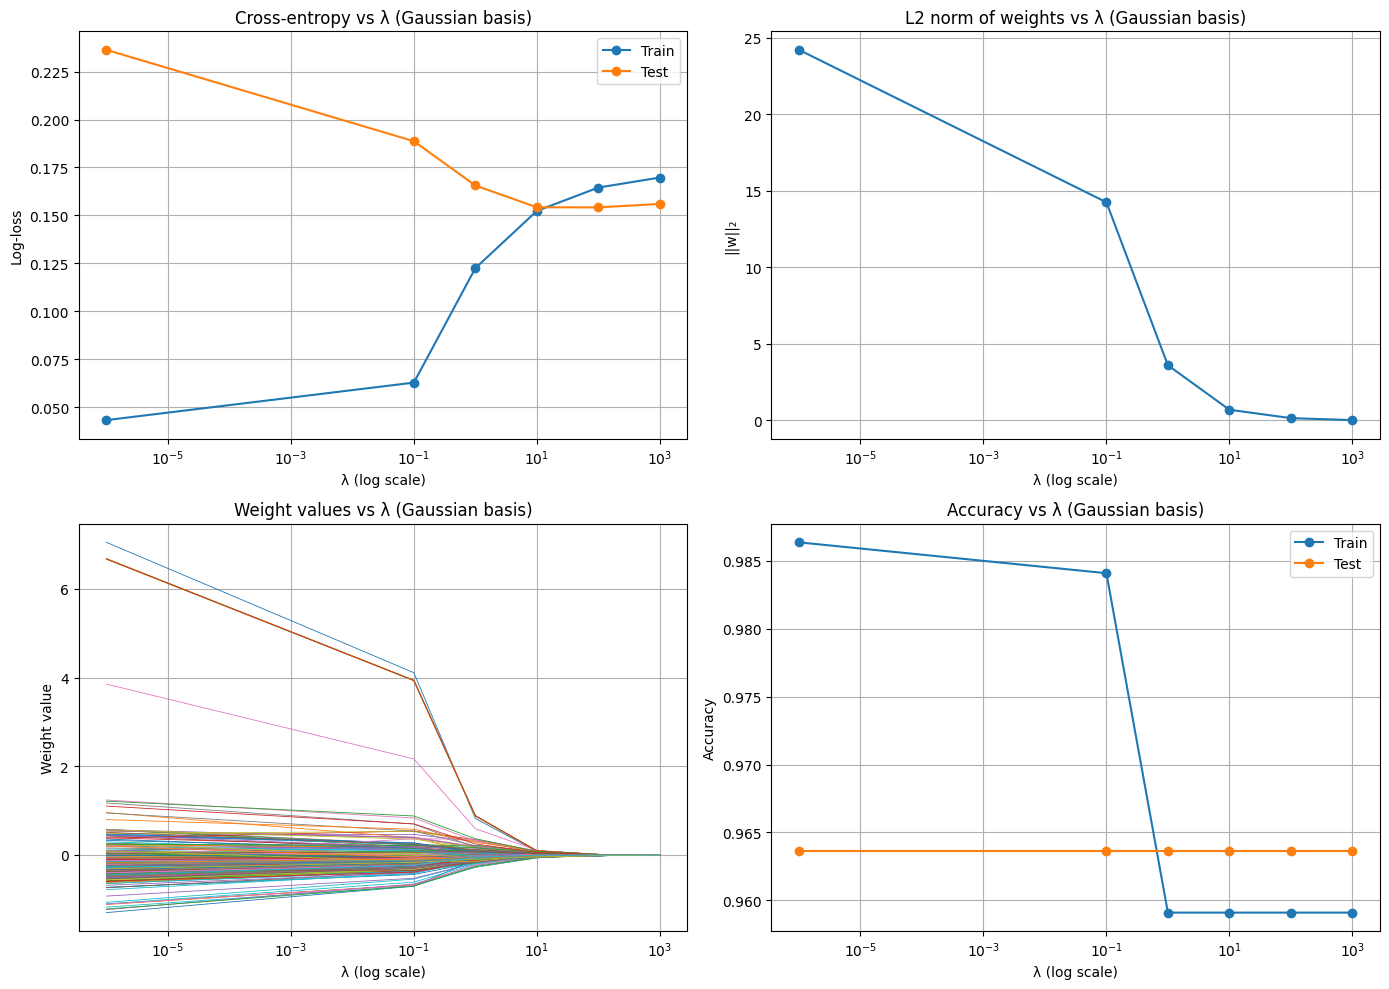

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


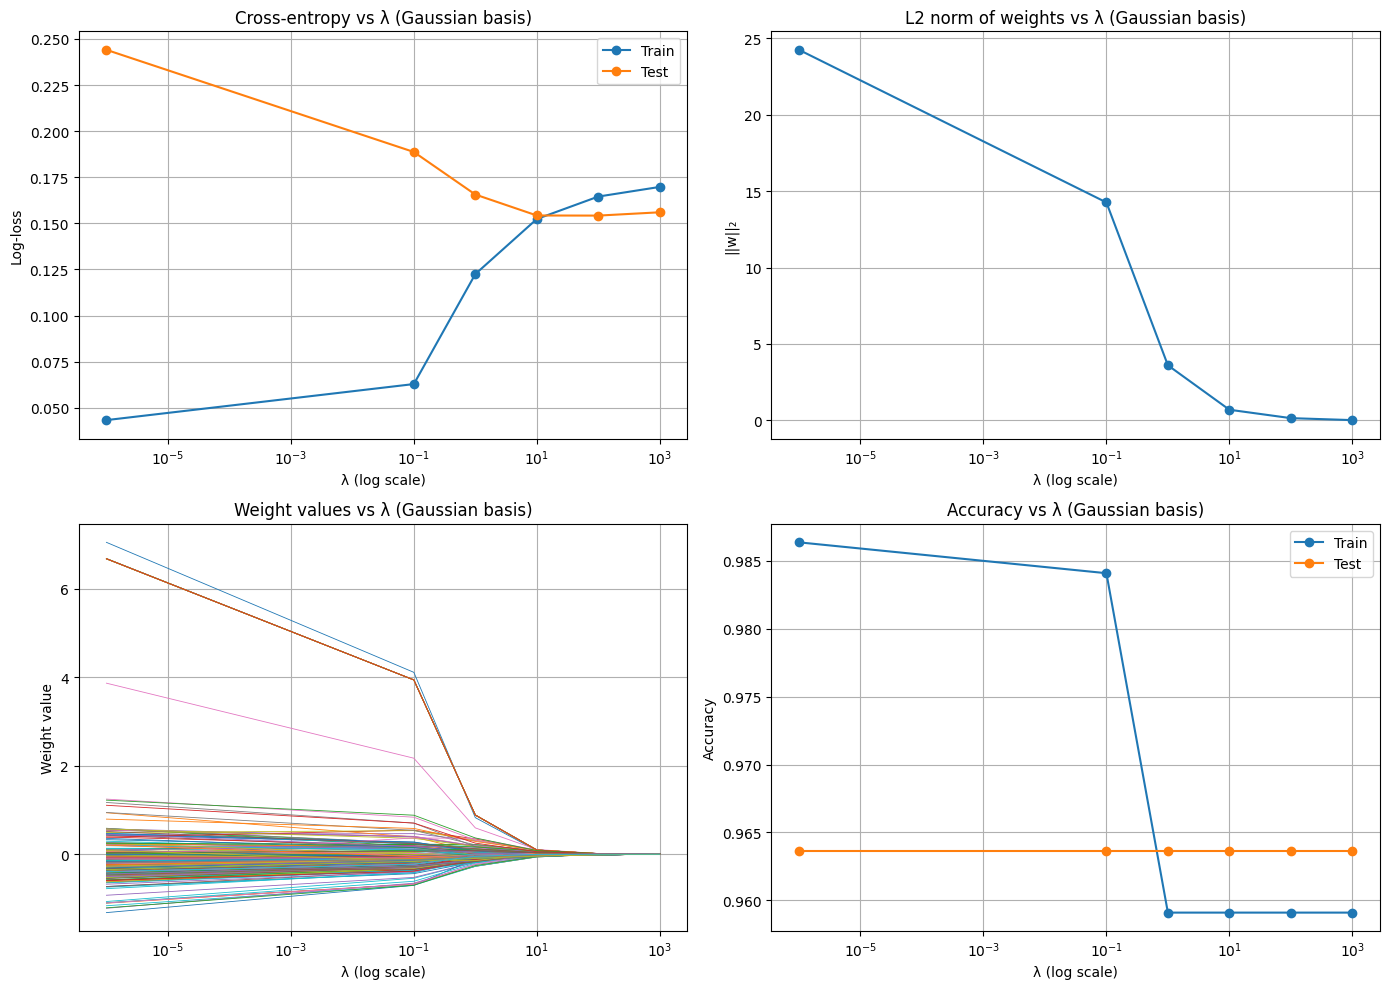

In [2]:
#1F)

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/ML/Santander Customer Satisfaction_train.csv")

# Reduce dataset size for faster execution
df_sample, _ = train_test_split(
    df, train_size=550, random_state=42, stratify=df["TARGET"]
)

# Prepare X and y
X = df_sample.drop(columns=["ID", "TARGET"])
y = df_sample["TARGET"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Handle missing values + scaling
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Gaussian basis expansion (σ fixed)
sigma = 1.0
X_train_exp = rbf_kernel(X_train, X_train, gamma=1/(2*sigma**2))
X_test_exp = rbf_kernel(X_test, X_train, gamma=1/(2*sigma**2))

# Logistic regression with λ sweep
lambdas = [0, 0.1, 1, 10, 100, 1000]
train_losses, test_losses, train_accs, test_accs, coef_norms, coefs = [], [], [], [], [], []

for lam in lambdas:
    if lam == 0:
        clf = LogisticRegression(penalty=None, solver="saga", max_iter=500)
    else:
        C = 1.0 / lam
        clf = LogisticRegression(penalty="l2", C=C, solver="saga", max_iter=500)

    clf.fit(X_train_exp, y_train)

    y_train_pred = clf.predict_proba(X_train_exp)
    y_test_pred = clf.predict_proba(X_test_exp)

    train_losses.append(log_loss(y_train, y_train_pred))
    test_losses.append(log_loss(y_test, y_test_pred))
    train_accs.append(accuracy_score(y_train, clf.predict(X_train_exp)))
    test_accs.append(accuracy_score(y_test, clf.predict(X_test_exp)))
    coefs.append(clf.coef_.ravel())
    coef_norms.append(np.linalg.norm(clf.coef_))

coefs = np.array(coefs)
coef_norms = np.array(coef_norms)
xvals = [1e-6 if lam == 0 else lam for lam in lambdas]

# Plots
plt.figure(figsize=(14,10))

# 1. Cross-entropy
plt.subplot(2,2,1)
plt.plot(xvals, train_losses, marker="o", label="Train")
plt.plot(xvals, test_losses, marker="o", label="Test")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Log-loss")
plt.title("Cross-entropy vs λ (Gaussian basis)")
plt.legend()
plt.grid(True)

# 2. L2 norm of weights
plt.subplot(2,2,2)
plt.plot(xvals, coef_norms, marker="o")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("||w||₂")
plt.title("L2 norm of weights vs λ (Gaussian basis)")
plt.grid(True)

# 3. Weight values
plt.subplot(2,2,3)
for j in range(coefs.shape[1]):
    plt.plot(xvals, coefs[:, j], linewidth=0.6)
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Weight value")
plt.title("Weight values vs λ (Gaussian basis)")
plt.grid(True)

# 4. Accuracy
plt.subplot(2,2,4)
plt.plot(xvals, train_accs, marker="o", label="Train")
plt.plot(xvals, test_accs, marker="o", label="Test")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs λ (Gaussian basis)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Cross-entropy & Accuracy vs λ: Small λ allows overfitting, giving low training loss and high training accuracy but poorer test performance. Moderate λ balances bias and variance, improving generalization. Large λ causes underfitting, increasing loss and lowering accuracy on both sets.

L2 Norm & Weight values vs λ: Increasing λ shrinks the weights, reducing model complexity. Small λ produces large, varied weights, while large λ flattens them near zero, showing strong regularization and reduced feature influence.

### Q1(g) Comparison of Logistic Regression (Raw vs Gaussian Basis)

Using raw features, logistic regression is linear, with performance largely controlled by λ; it can overfit or underfit but may miss complex patterns. Gaussian basis expansion maps features into a higher-dimensional space, allowing the model to capture nonlinear relationships. With a well-chosen σ, it improves test accuracy, though λ is still needed to control overfitting. Too small σ can cause overfitting, while too large σ leads to underfitting. Overall, raw logistic regression is simpler and faster, whereas Gaussian basis expansion provides greater flexibility, captures complex patterns better, and demonstrates how feature transformations can shift the bias–variance tradeoff.


### Q1(j) Why jointly learn the RBF centers?

Fixed RBF centers, chosen before training (e.g., via k-means or randomly), may not align with the regions critical for classification and can waste model capacity if placed in sparse or irrelevant areas. By jointly learning the centers through gradient descent, they adapt during training toward regions where the model struggles, typically near decision boundaries. This produces more expressive features, often requiring fewer centers and improving generalization by balancing feature placement with weight regularization. The trade-off is that optimization becomes non-convex and more computationally expensive, but overall, jointly learning RBF centers integrates feature construction into the learning process, enhancing accuracy and efficiency compared to fixed centers


In [8]:
#2)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_auc_score, RocCurveDisplay

# Make plots look better
plt.style.use("seaborn-v0_8")


In [9]:
#Load Data
file_path = "/content/drive/MyDrive/ML/titanic_train.csv"
df = pd.read_csv(file_path)
# Data Preprocessing
# Drop irrelevant columns
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Fill missing values
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
# Encode categorical variables
le_sex = LabelEncoder()
df["Sex"] = le_sex.fit_transform(df["Sex"])

le_embarked = LabelEncoder()
df["Embarked"] = le_embarked.fit_transform(df["Embarked"])

3. Data Preprocessing

Before applying machine learning algorithms, the dataset is cleaned and prepared. Irrelevant features such as Passenger ID, Name, Ticket number, and Cabin are removed since they do not contribute meaningfully to prediction. Missing values in the Age column are replaced with the median age, while missing values in the Embarked column are filled with the most frequent value. Next, categorical variables such as Sex and Embarked are encoded into numerical values using Label Encoding. Finally, the features are standardized using StandardScaler to ensure that all attributes contribute equally to the model without being dominated by features with larger scales.

In [10]:
# Regression (Predict Age)
X = df.drop(columns=["Age", "Survived"])
y = df["Age"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Regression: Predicting Passenger Age

The first task is a regression problem, where we try to predict a passenger’s age using other available features. Three models are implemented: Linear Regression, Ridge Regression, and Lasso Regression. Linear Regression serves as a baseline model. Ridge Regression applies L2 regularization, which helps to reduce overfitting by shrinking coefficients. Lasso Regression applies L1 regularization, which not only reduces overfitting but can also drive some coefficients to zero, effectively performing feature selection. The models are trained on 80% of the data and tested on 20%. Their performance is evaluated using Mean Squared Error (MSE) and the R² score, which indicates how much variance in age can be explained by the features.

In [11]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lin = lin_reg.predict(X_test_scaled)
print("Linear Regression Test MSE:", mean_squared_error(y_test, y_pred_lin))
print("Linear Regression R² (Test):", r2_score(y_test, y_pred_lin))

Linear Regression Test MSE: 141.43074910829898
Linear Regression R² (Test): 0.1691973533657526


In [12]:
# Ridge Regression
ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
print("Ridge Regression Test MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression R² (Test):", r2_score(y_test, y_pred_ridge))


Ridge Regression Test MSE: 141.49043409284968
Ridge Regression R² (Test): 0.1688467475502443


In [13]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
print("Lasso Regression Test MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression R² (Test):", r2_score(y_test, y_pred_lasso))

Lasso Regression Test MSE: 141.31475813299645
Lasso Regression R² (Test): 0.1698787158691304


In [14]:
# Classification (Predict Survival)
X_c = df.drop(columns=["Survived"])
y_c = df["Survived"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_c_scaled, y_train_c)

y_pred_c = log_reg.predict(X_test_c_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test_c, y_pred_c))

Logistic Regression Accuracy: 0.8044692737430168


Classification: Predicting Survival

The second task is a classification problem, where the goal is to predict whether a passenger survived (1) or not (0). Logistic Regression is applied to this problem. After splitting the data into training and testing sets, the features are standardized and the model is trained. Predictions are evaluated using Accuracy Score to measure overall correctness, the Confusion Matrix to show correct vs. incorrect classifications, and the ROC-AUC score to measure the model’s ability to distinguish between survivors and non-survivors across thresholds. The ROC curve provides a visual representation of this ability.

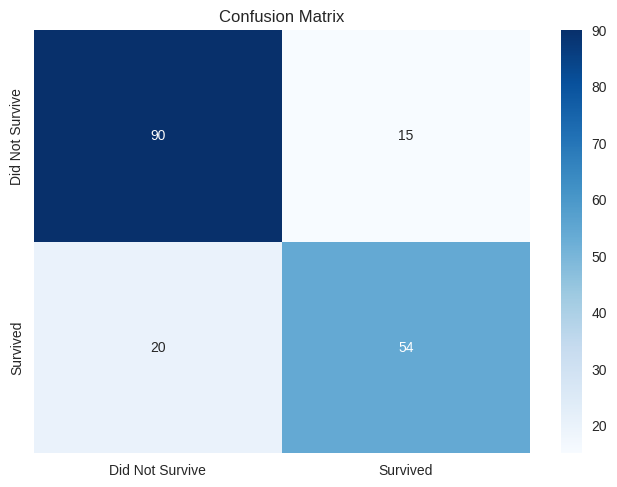

ROC-AUC Score: 0.8818532818532818


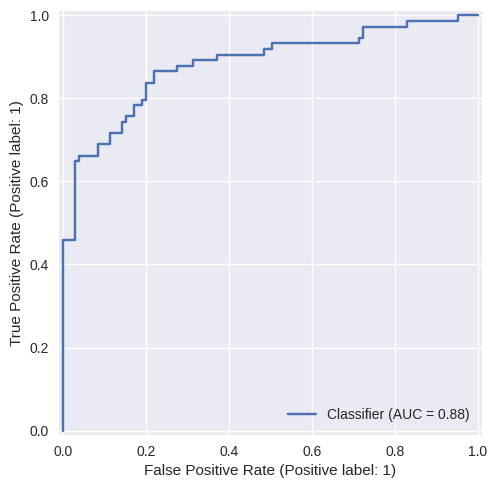

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Did Not Survive", "Survived"], yticklabels=["Did Not Survive", "Survived"])
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_proba = log_reg.predict_proba(X_test_c_scaled)[:, 1]
roc_auc = roc_auc_score(y_test_c, y_proba)
print("ROC-AUC Score:", roc_auc)

RocCurveDisplay.from_predictions(y_test_c, y_proba)
plt.show()


Visualization and Results

For classification, a Confusion Matrix heatmap is plotted to give an intuitive understanding of how well the model predicts survival outcomes. The ROC curve is also displayed, along with the AUC score, to evaluate model performance in terms of sensitivity and specificity. In regression, performance is interpreted using the error metrics (MSE and R²). Together, these results show the strengths and limitations of each model applied to the Titanic dataset.